# Machine Learning Examination

In [1]:
#Name: Mwanje Musa
#Reg No: MAY22/MSC/1615U
#Programme: MSc. COMP (CS)

# a) Import the necessary python libraries (2 marks)

In [2]:
import requests
import lxml.html as lh
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

# b) Remove the Website and put the table in Notebook (4 marks)

In [3]:
ebola_data ='https://www.who.int/news-room/fact-sheets/detail/ebola-virus-disease'

page =requests.get(ebola_data)

doc = lh.fromstring(page.content)

tr_elements = doc.xpath('//tr')

[len(T) for T in tr_elements[:12]]

[6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6]

In [4]:
#check the table header

tr_elements = doc.xpath('//tr')

col = []
i = 0

for t in tr_elements[0]:
    i+=1
    name=t.text_content()
    print("%d:%s" % (i,name))
    col.append((name,[]))

1:Year
2:Country
3:EVD
4:Cases
5:Deaths
6:Case fatality 


In [5]:
#Check the data in other rows
for j in range(1,len(tr_elements)): # Because header is the first row, data would be store in the subsequent rows.
    T = tr_elements[j] #T is j'th row
    
    if len(T)!=6: #if row is not size 3, //tr data is not from the table.
        break
        
    i = 0 #i is the index of the first column
    
    for t in T.iterchildren(): #iterate through each element of the row
        data=t.text_content()
            
        col[i][1].append(data) #append the data to the empty list of the i'th column
            
        i+=1 #increment i for the next column

In [6]:
#To see the No of Rows and Columns
[len(C) for (title,C) in col]

[41, 41, 41, 41, 41, 41]

# c) Displays the data frame with 

In [7]:
#Create a dataframe and read the file
Dict = {title:column for (title,column) in col}
df = pd.DataFrame(Dict)

# First 10 records (2 marks)
df.head(10)

,Year,Country,EVD,Cases,Deaths,Case fatality
0,2021,Guinea,Zaire,Ongoing,,
1,2021,Democratic Republic of the Congo,Zaire,Ongoing,,
2,2020,Democratic Republic of the Congo,Zaire,130,55,42%
3,2018-2020,Democratic Republic of the Congo,Zaire,3481,2299,66%
4,2018,Democratic Republic of the Congo,Zaire,54,33,61%
5,2017,Democratic Republic of the Congo,Zaire,8,4,50%
6,2015,Italy,Zaire,1,0,0%
7,2014,Spain,Zaire,1,0,0%
8,2014,UK,Zaire,1,0,0%
9,2014,USA,Zaire,4,1,25%


In [8]:
# Last 10 records (2 marks)
df.tail(10)

,Year,Country,EVD,Cases,Deaths,Case fatality
31,1996,South Africa (ex-Gabon),Zaire,1,1,100%
32,1996 (Jul-Dec),Gabon,Zaire,60,45,75%
33,1996 (Jan-Apr),Gabon,Zaire,31,21,68%
34,1995,Democratic Republic of the Congo,Zaire,315,254,81%
35,1994,Côte d'Ivoire,Taï Forest,1,0,0%
36,1994,Gabon,Zaire,52,31,60%
37,1979,Sudan,Sudan,34,22,65%
38,1977,Democratic Republic of the Congo,Zaire,1,1,100%
39,1976,Sudan,Sudan,284,151,53%
40,1976,Democratic Republic of the Congo,Zaire,318,280,88%


# d) Clean the data set (8 marks)

In [9]:
df.shape

(41, 6)

In [10]:
#Remove row 0
dfc =df.drop([df.index[0]])
dfc.head(10)

,Year,Country,EVD,Cases,Deaths,Case fatality
1,2021,Democratic Republic of the Congo,Zaire,Ongoing,,
2,2020,Democratic Republic of the Congo,Zaire,130,55,42%
3,2018-2020,Democratic Republic of the Congo,Zaire,3481,2299,66%
4,2018,Democratic Republic of the Congo,Zaire,54,33,61%
5,2017,Democratic Republic of the Congo,Zaire,8,4,50%
6,2015,Italy,Zaire,1,0,0%
7,2014,Spain,Zaire,1,0,0%
8,2014,UK,Zaire,1,0,0%
9,2014,USA,Zaire,4,1,25%
10,2014,Senegal,Zaire,1,0,0%


In [11]:
# Removing fields with NaN, empty cells, non meaning full rows etc
df = dfc.drop([1,3,13,14,15,16,26,27,28,29,32,33])
df['Cases'] = df['Cases'].str.strip()
df['Deaths'] = df['Deaths'].str.strip()
df['Year'] = df['Year'].str.replace(r"\(.*\)","",regex = True)
df.iloc[:,5] =df.iloc[:,5].str.replace(r"%","")
df.iloc[:,5] =df.iloc[:,5].str.strip()
df['Year'] = df['Year'].str.strip()

df['Year'] = pd.to_numeric(df['Year'])
df['Cases'] = pd.to_numeric(df['Cases'])
df['Deaths'] = pd.to_numeric(df['Deaths'])
df.iloc[:,5] =pd.to_numeric(df.iloc[:,5])
df.head()

,Year,Country,EVD,Cases,Deaths,Case fatality
2,2020,Democratic Republic of the Congo,Zaire,130,55,42
4,2018,Democratic Republic of the Congo,Zaire,54,33,61
5,2017,Democratic Republic of the Congo,Zaire,8,4,50
6,2015,Italy,Zaire,1,0,0
7,2014,Spain,Zaire,1,0,0


# e) Produce the descriptive statistical table values. (2 marks)

In [12]:
df.describe()

,Year,Cases,Deaths,Case fatality
count,28.000000,28.000000,28.000000,28.000000
mean,2004.250000,79.357143,49.178571,51.285714
std,13.470475,122.739475,84.257565,31.622609
min,1976.000000,1.000000,0.000000,0.000000
25%,1995.750000,1.000000,1.000000,36.250000
50%,2009.500000,18.500000,9.000000,53.000000
75%,2014.000000,75.250000,34.000000,72.000000
max,2020.000000,425.000000,280.000000,100.000000


# f) Check the correlations between the features (2 marks)

In [13]:
df.corr()

,Year,Cases,Deaths,Case fatality
Year,1.000000,-0.402559,-0.450331,-0.410217
Cases,-0.402559,1.000000,0.956410,0.228855
Deaths,-0.450331,0.956410,1.000000,0.308946
Case fatality,-0.410217,0.228855,0.308946,1.000000


Looking the table above, there is a very high positive correlation between deaths and cases. For other variables, the correlation is just moderate. 

# g) Generate the regression plots between variables.  (2 marks)

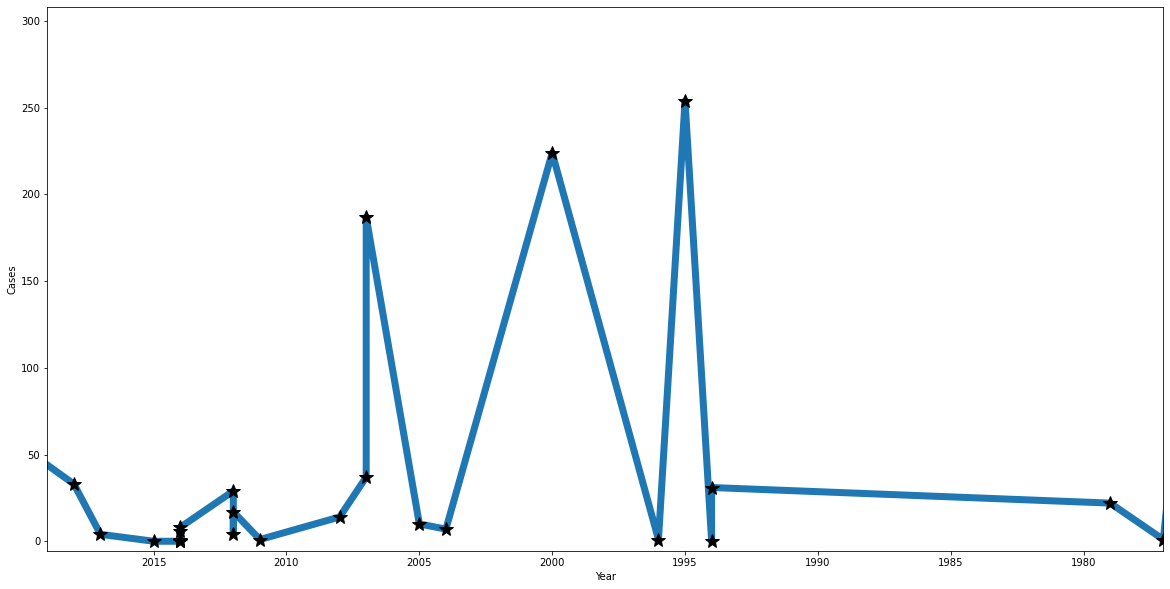

In [14]:
plt.figure(figsize = (20,10))

x = df.Year
y = df.Deaths

plt.plot(x, y, label =' ', linewidth = 7)
plt.plot(x, y,'*k', markersize = 14, label = '')

plt.axis([x.iloc[0]-1, x.iloc[-1]+1, y.iloc[0]*-0.1,  y.iloc[-1]*1.1])

plt.xlabel('Year')
plt.ylabel('Cases')

plt.rcParams.update({'font.size': 26})
plt.show()

# h) Generate a heatmap for the correlations of features. (4 marks)

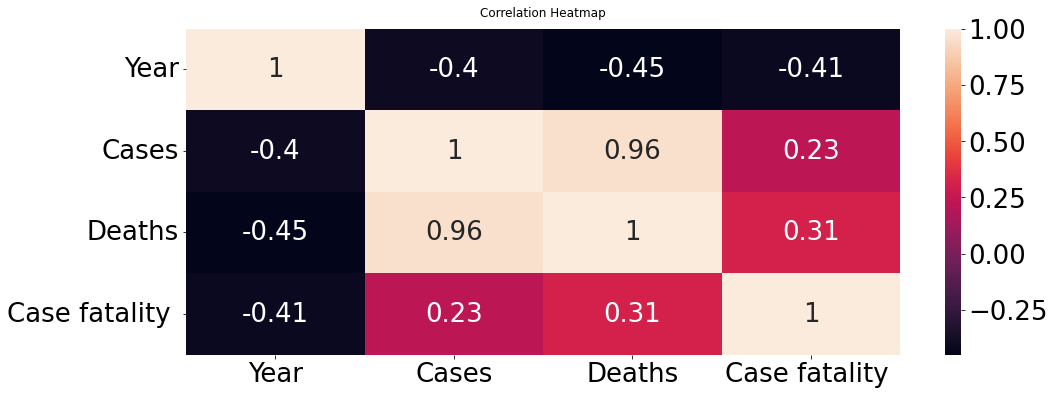

In [15]:
#this figure helps us to relate the correelation between features
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(method ='pearson'), annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# i) Produce Simple Linear Regression model to show relationship between the two features that are strongly correlated. (4 marks)

In [16]:
#df.corr(method ='pearson')

The two most strongly correlated features are cases and deathes. Therefore, we fitter a linear regression model cases against deaths.

In [17]:
# dependent variable for y axis
y = df['Deaths']
# independent variable for x axis
x = np.c_[df['Cases']]

lm = LinearRegression()
lm_model = lm.fit(x,y)

# j) Compute the slope and the intercept of your graph and deduce your model in the form y=mx+c  (4 marks)


In [18]:
# dependent variable for y axis
y = df['Cases']
# independent variable for x axis
x = np.c_[df['Year']]

In [19]:
#fitting a simple regression model for predicting popluation using year
lm = LinearRegression()
lm_model = lm.fit(x,y)

print ('The slope of line is:', lm_model.coef_)
print ('The y-intercept is:',lm_model.intercept_)

The slope of line is: [-3.66801041]
The y-intercept is: 7430.967006611799


# k) Evaluate your model and make a conclusion based on R-square and Mean Square Error values. (4 marks)

In [22]:
#prediction
year_X = np.c_[2028]
pred_model = lm.predict(year_X)
pred_model

array([-7.75810437])

In [24]:
from sklearn import metrics
print('r2_score', metrics.r2_score(pred_model,year_X))
print('RMSE',np.sqrt(metrics.mean_squared_error(pred_model,year_X)))

r2_score nan
RMSE 2035.7581043745759


/Users/musa-mets/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_regression.py:796: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [25]:
df.head()

,Year,Country,EVD,Cases,Deaths,Case fatality
2,2020,Democratic Republic of the Congo,Zaire,130,55,42
4,2018,Democratic Republic of the Congo,Zaire,54,33,61
5,2017,Democratic Republic of the Congo,Zaire,8,4,50
6,2015,Italy,Zaire,1,0,0
7,2014,Spain,Zaire,1,0,0


# SECTION B

# Question Three

## a)	Import necessary libraries for Decision Trees algorithm. (4 marks)

In [26]:
# importing the required modules
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
# splitting the dataaset into Training and Testing Data 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# importing decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
# importing the plot tree method
from sklearn.tree import DecisionTreeClassifier, plot_tree

## b) Build an empty Decision Tree object with depth 5. (4 marks)


I have created an empty decision tree classifier initialized with `tree model`, with depth = 5, and information gain idenx of entropy.

In [27]:
tree_model = DecisionTreeClassifier(max_depth =5,criterion='entropy', random_state = 2)

# c) Train the decision tree using the global X data set. (4 marks)

In [28]:
#creating input variables
X = df.iloc[:, [0,3,4,5]].values
#output variable
y = df.iloc[:, 2].values

# splitting the dataset randomly and test size if 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

tree_model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=2)

## d) Print the Decision Tree to appear similar to the figure below. (4 marks)

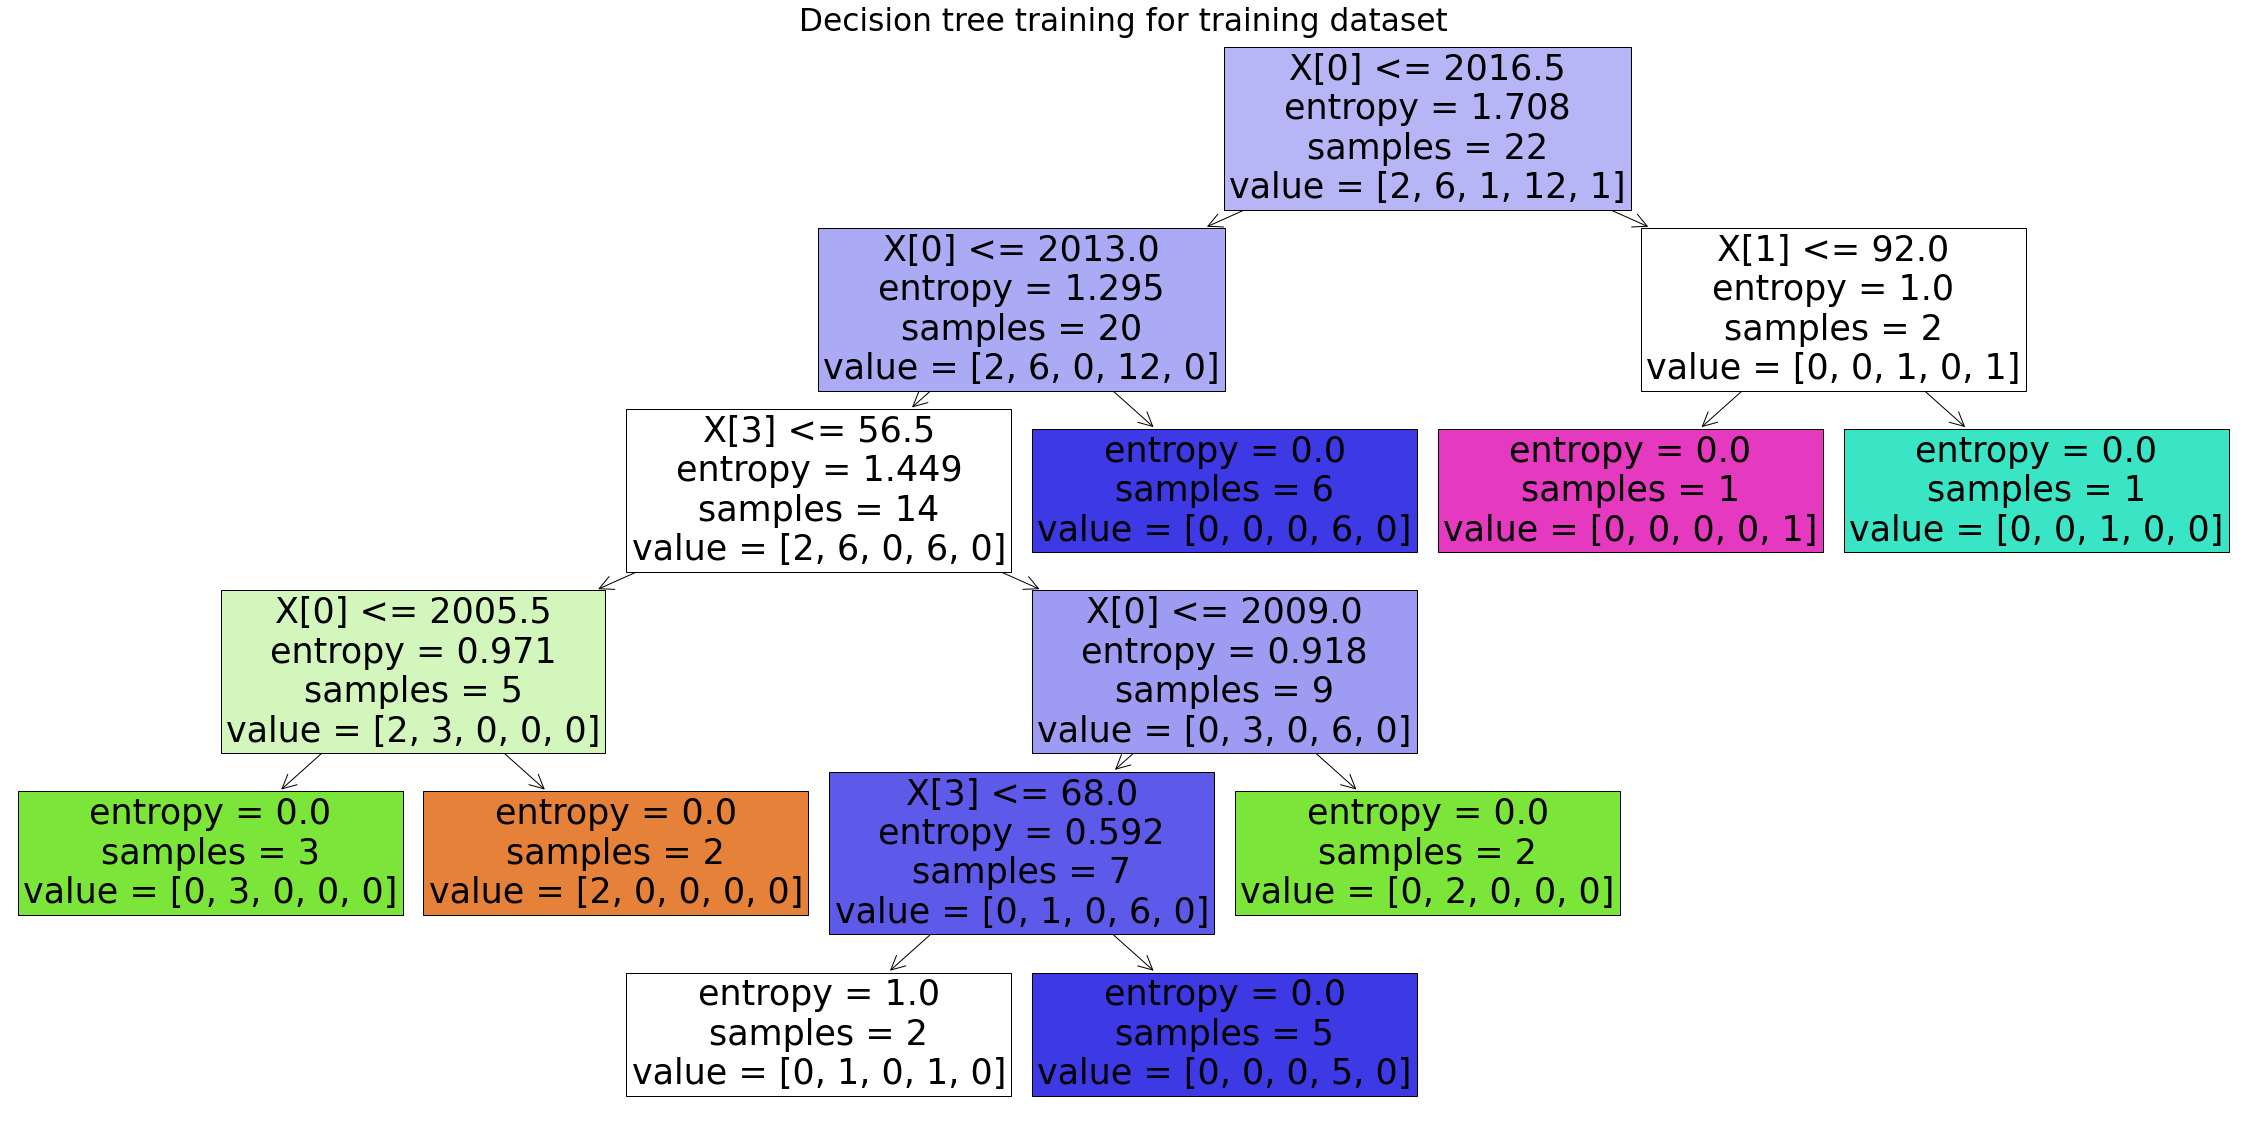

In [29]:
# output size of decision tree
plt.figure(figsize=(40,20))


plot_tree(tree_model, filled=True)
plt.title("Decision tree training for training dataset")
plt.show()

## e) Evaluate the Decision Tree model using Jaccard index and F1-score values. (4 marks)

In [65]:
#prediction using the test set
y_pred = tree_model.predict(X_test) 

sklearn.metrics.jaccard_score(y_test, y_pred, average='weighted')

0.5833333333333334

In [66]:
#F1 - score
print('F1 score:', f1_score(y_test, y_pred,average='weighted'))

F1 score: 0.6777777777777777


# Question Five

# a) Import necessary libraries for Logistic Regression algorithm. (5 marks)

In [67]:
!pip install six

In [70]:
import pylab as pl 
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn import metrics
from six import StringIO
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler 
import sklearn.metrics
 
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

# b) Produce the Logistic Regression model. (5 marks)

In [71]:
LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

# c) Calculate accuracy of the model and F1 for Logistic Regression. (5 marks)

In [72]:
#prediction using the test set
lr_pred = LR.predict(X_test)

print('The accuracy rate of the model:' ,(accuracy_score(y_test, lr_pred)*100),'%')
#F1 - score
print('F1 score:', (f1_score(y_test, lr_pred,average='weighted')*100),'%')

The accuracy rate of the model: 50.0 %
F1 score: 33.33333333333333 %


## d) Produce the Jaccard index score and Log loss values. (5 marks)

In [73]:
sklearn.metrics.jaccard_score(y_test, lr_pred, average='weighted')

0.25

In [105]:
# printing the loss functions
pred_lr = LR.predict_proba(X_test)

print('The log loss of the model is:', log_loss(y_test, pred_lr))

# Question Four

# a) Import necessary libraries for Support Vector Machine (SVM) algorithm. (5 marks)

In [106]:
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
import itertools

# b) Produce the SVM model. (5 marks)

In [107]:
EVDSVM = svm.SVC(kernel='rbf')
EVDSVM.fit(X, y)

SVC()

## c) Calculate accuracy of the model and F1 for Support Vector Machine. (5 marks)

In [108]:
#prediction using the test set
#svm_pred = svm_model.predict(X_test)

#print('The accuracy rate of the model:' ,(accuracy_score(y_test, svm_pred)*100),'%')
#F1 - score
#print('F1 score:', (f1_score(y_test, svm_pred,average='weighted')*100),'%')

In [110]:
yhat_svm=EVDSVM.predict(X)
svm_jacc_test=sklearn.metrics.jaccard_score(y, yhat_svm, average='weighted')
svm_f1_test=metrics.f1_score(y, yhat_svm, average ='macro')
svm_cnf_matrix = confusion_matrix(y, yhat_svm)
print("Accuracy is ", svm_jacc_test, " F1 is" , svm_f1_test)
print(classification_report(y, yhat_svm))
svm_cnf_matrix

Accuracy is  0.2869897959183673  F1 is 0.11627906976744186
              precision    recall  f1-score   support

 Bundibugyo        0.00      0.00      0.00         2
      Sudan        0.00      0.00      0.00         7
 Taï Forest        0.00      0.00      0.00         1
       Zaire       0.00      0.00      0.00         1
      Zaire        0.54      1.00      0.70        15
     Zaire         0.00      0.00      0.00         2

    accuracy                           0.54        28
   macro avg       0.09      0.17      0.12        28
weighted avg       0.29      0.54      0.37        28



/Users/musa-mets/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/musa-mets/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/musa-mets/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  7,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 15,  0],
       [ 0,  0,  0,  0,  2,  0]])

## d) Product the Jaccard index score and Log loss values. (5 marks)

In [96]:
sklearn.metrics.jaccard_score(y_test, svm_pred, average='macro')

0.125

In [111]:
# printing the loss functions
pred_svm = LR.predict_proba(X_test)

print('The log loss of the model is:', log_loss(y_test, pred_svm))